In [134]:
import pandas as pd

In [135]:
data = pd.read_csv('911.csv')

In [136]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## 1. How many different types of calls?

In [137]:
data['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [138]:
def seperator(x):
    x = x.split(':')
    return x

In [139]:
emergency = data['title'].apply(seperator)

In [140]:
emergency.head(3)

0     [EMS,  BACK PAINS/INJURY]
1    [EMS,  DIABETIC EMERGENCY]
2        [Fire,  GAS-ODOR/LEAK]
Name: title, dtype: object

In [141]:
def call_seprator(x):
    x = x.split(':')
    return x[0]

In [142]:
call = data['title'].apply(call_seprator)

In [143]:
call.head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: title, dtype: object

In [144]:
data['call type'] = call

In [145]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [146]:
data['call type'].nunique()

3

In [147]:
data['call type'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call type, dtype: int64

In [148]:
def emergency_seperator(x):
    x = x.split(':')
    return x[1]

In [149]:
data['emergency'] = data['title'].apply(emergency_seperator)

In [150]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call type,emergency
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


### Extract Date and Time regarding the calls

In [151]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'],infer_datetime_format=True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 11 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call type    423909 non-null object
emergency    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 35.6+ MB


In [153]:
data['Year'] = pd.DatetimeIndex(data['timeStamp']).year

In [154]:
# data['Month'] = pd.DatetimeIndex(data['timeStamp']).month
# data['Month'] = data['timeStamp'].dt.month
data['Month'] = data['timeStamp'].dt.month_name()

In [155]:
import datetime as dt
data['Day'] = data['timeStamp'].dt.day_name()

In [157]:
data['Day'].head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: Day, dtype: object

In [158]:
data['Hour'] = data['timeStamp'].dt.hour

In [159]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call type,emergency,Year,Month,Day,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,December,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,December,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,December,Thursday,16


### 3. At what time of day/month I can expect which type of call

In [160]:
data['call type'][data['Month']=='December']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
290589        EMS
290590    Traffic
290591       Fire
290592        EMS
290593       Fire
290594        EMS
290595    Traffic
290596    Traffic
290597        EMS
290598        EMS
290599        EMS
290600       Fire
290601       Fire
290602       Fire
290603        EMS
290604        EMS
290605        EMS
290606    Traffic
290607        EMS
290608       Fire
290609       Fire
290610       Fire
290611        EMS
290612        EMS
290613    

### 4. Visualize the percentage share of emergency type for each call.

In [161]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call type,emergency,Year,Month,Day,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,December,Thursday,14


In [162]:
call_data= data.groupby('Month')['call type'].value_counts()

In [163]:
call_data.head()

Month   call type
April   EMS          17255
        Traffic      11345
        Fire          4983
August  EMS          17965
        Traffic      12290
Name: call type, dtype: int64

In [164]:
call_data_percentage = call_data.groupby(level=0).apply(lambda x: round(100*(x/float(x.sum()))))

In [165]:
call_data_percentage.head()

Month   call type
April   EMS          51.0
        Traffic      34.0
        Fire         15.0
August  EMS          50.0
        Traffic      34.0
Name: call type, dtype: float64

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [168]:
call_data_percentage = call_data_percentage.reindex(month_order, level=0)

In [169]:
call_data_percentage = call_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

Text(0.5, 1.0, 'Calls/Month')

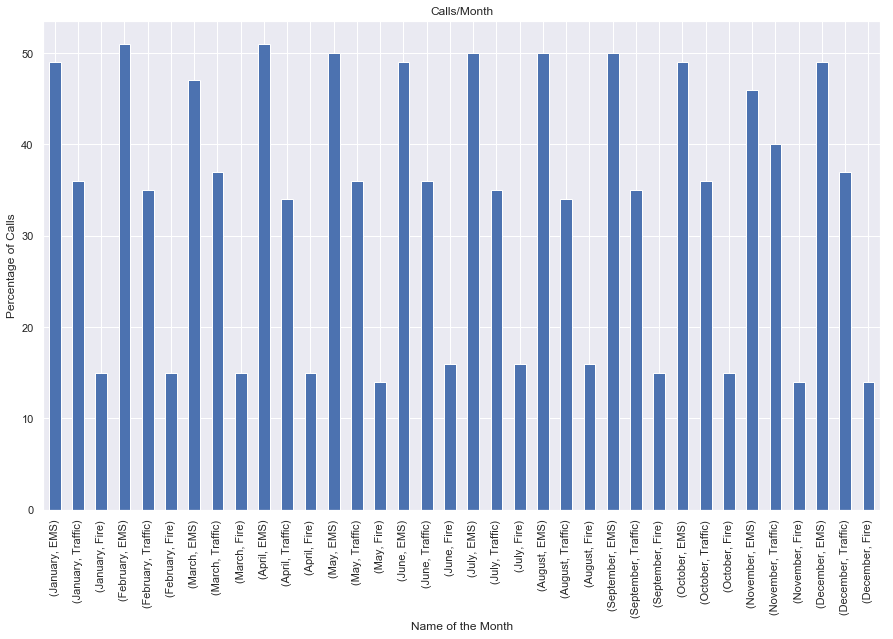

In [170]:
sns.set(rc={'figure.figsize':(15, 9)})
call_data_percentage.plot(kind='bar')
plt.xlabel('Name of the Month')
plt.ylabel('Percentage of Calls')
# plt.xticks(rotation=30)
plt.title('Calls/Month')

In [171]:
font = {
    'size' : 'x-large',
    'weight' : 'heavy'
}

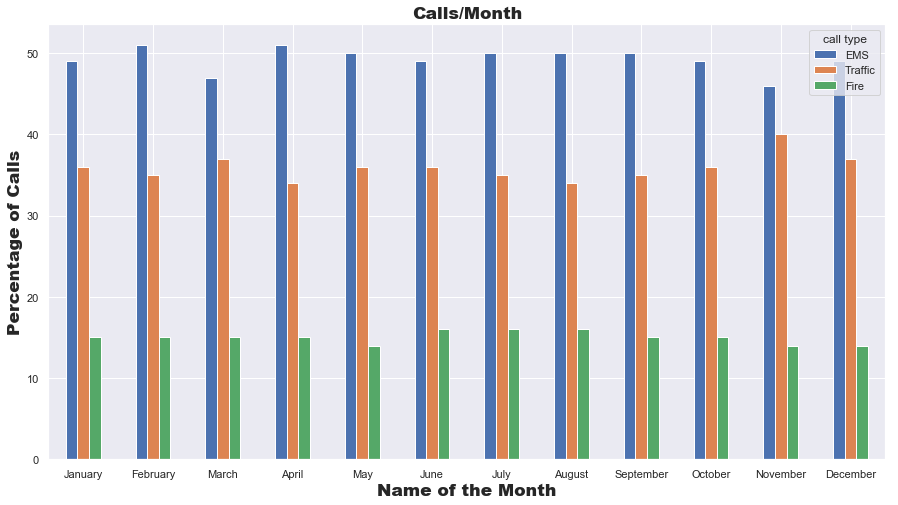

In [189]:
sns.set(rc={'figure.figsize':(15, 8)})
call_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)
plt.savefig('sample1.png')

#### Day data


In [174]:
call_data_day= data.groupby('Day')['call type'].value_counts()

In [175]:
call_data_day.head()

Day     call type
Friday  EMS          31010
        Traffic      25058
        Fire          9683
Monday  EMS          30431
        Traffic      21595
Name: call type, dtype: int64

In [176]:
day_series=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [177]:
call_data_day = call_data_day.reindex(day_series, level=0)

In [178]:
call_data_day.head()

Day      call type
Monday   EMS          30431
         Traffic      21595
         Fire          9292
Tuesday  EMS          30414
         Traffic      23441
Name: call type, dtype: int64

In [179]:
call_data_day = call_data_day.reindex(['EMS','Traffic','Fire'], level=1)

In [180]:
call_data_day_percentage = call_data_day.groupby(level=0).apply(lambda x: round(100*(x/float(x.sum()))))

In [181]:
call_data_day_percentage

Day        call type
Monday     EMS          50.0
           Traffic      35.0
           Fire         15.0
Tuesday    EMS          48.0
           Traffic      37.0
           Fire         15.0
Wednesday  EMS          48.0
           Traffic      37.0
           Fire         15.0
Thursday   EMS          48.0
           Traffic      38.0
           Fire         14.0
Friday     EMS          47.0
           Traffic      38.0
           Fire         15.0
Saturday   EMS          51.0
           Traffic      34.0
           Fire         16.0
Sunday     EMS          55.0
           Traffic      29.0
           Fire         17.0
Name: call type, dtype: float64

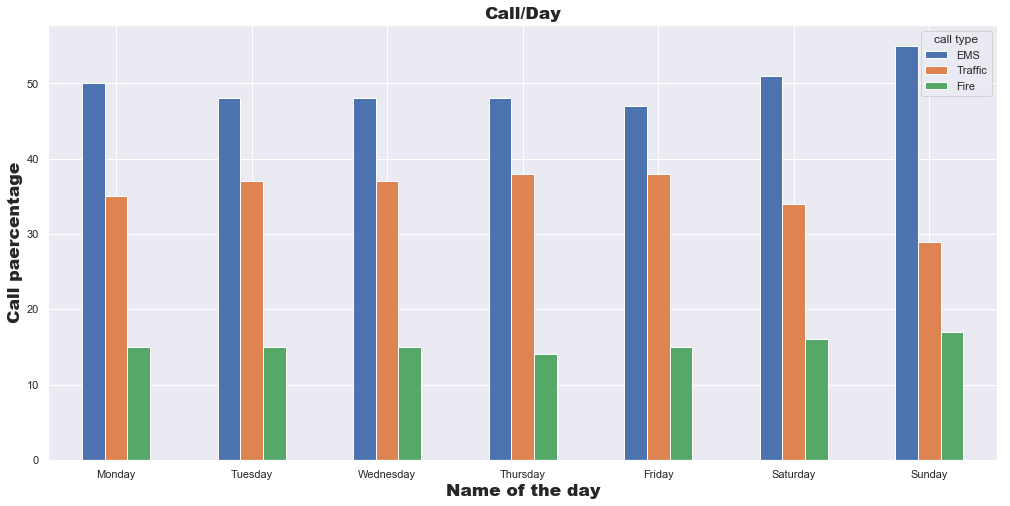

In [191]:
sns.set(rc={'figure.figsize' : (17,8)})
call_data_day_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the day',fontdict=font)
plt.ylabel('Call paercentage',fontdict=font)
plt.title('Call/Day',fontdict=font)
plt.xticks(rotation=0)
plt.savefig('sample2.png')

#### Hourly data

In [193]:
call_hour= data.groupby('Hour')['call type'].value_counts()

In [194]:
call_hour.head()

Hour  call type
0     EMS          5263
      Traffic      2046
      Fire         1341
1     EMS          4711
      Traffic      1566
Name: call type, dtype: int64

In [195]:
call_hour = call_hour.reindex(['EMS','Traffic','Fire'],level=1)

In [196]:
call_hour_percentage = call_hour.groupby(level=0).apply(lambda x : round(100*(x/float(x.sum()))) )

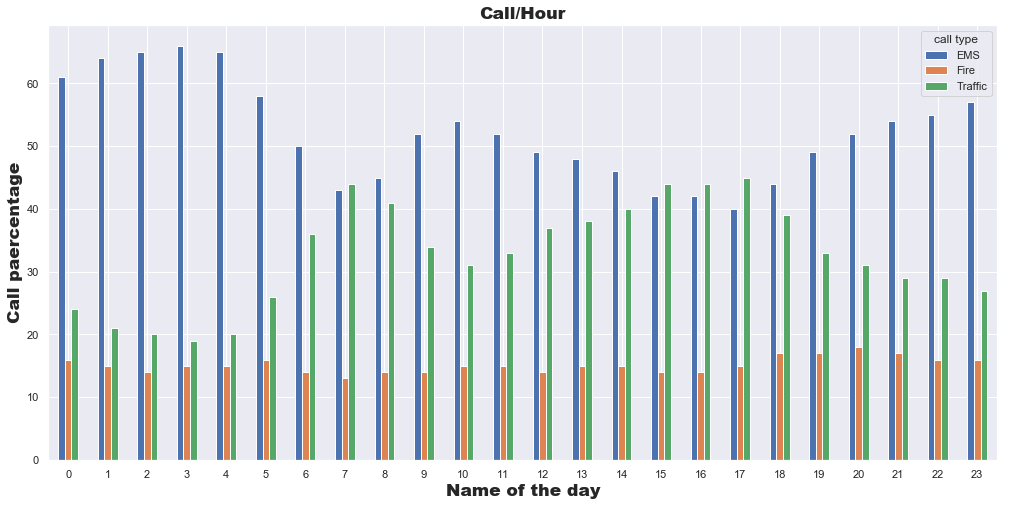

In [199]:
sns.set(rc={'figure.figsize' : (17,8)})
call_hour_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the day',fontdict=font)
plt.ylabel('Call paercentage',fontdict=font)
plt.title('Call/Hour',fontdict=font)
plt.xticks(rotation=0)
plt.savefig('sample3.png')